In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Paths
dataDir = "/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/Pothole_Segmentation_YOLOv8"  # Folder containing images


Mounted at /content/drive


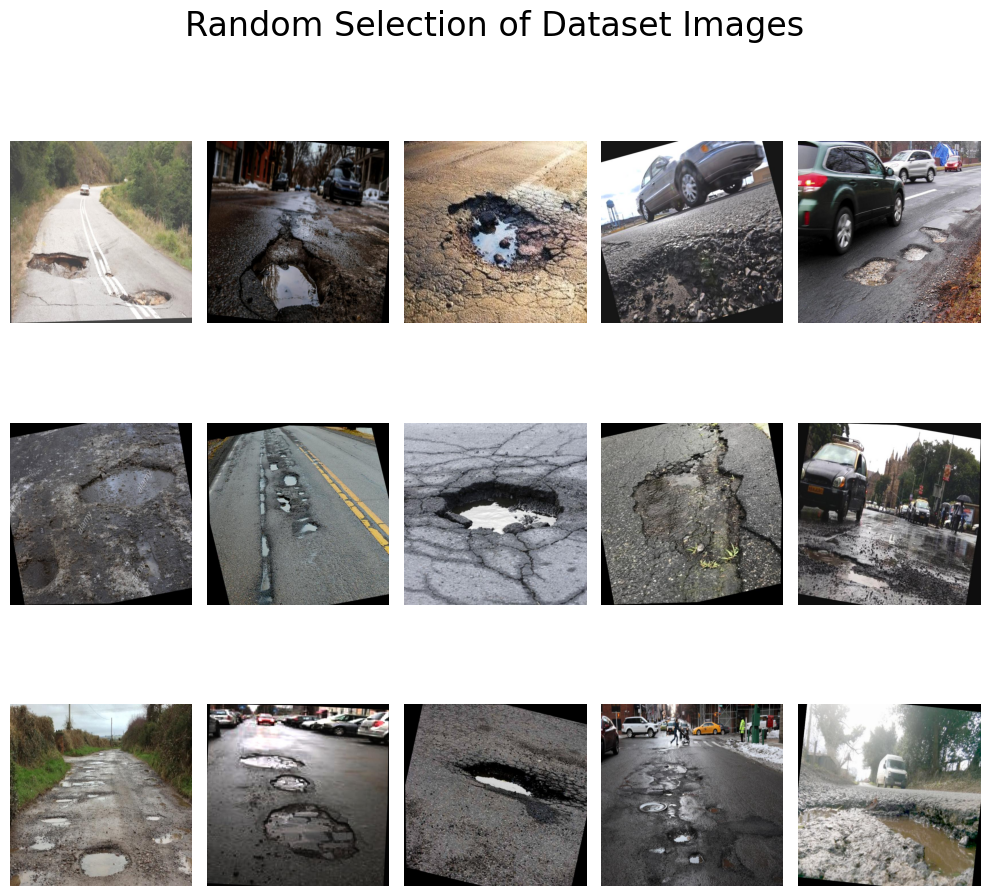

In [4]:
trainImagePath = os.path.join(dataDir, 'train','images')

#list of the images
imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)

plt.figure(figsize=(10, 10))

for i, image_file in enumerate(randomImages):

    image_path = os.path.join(trainImagePath, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

  # Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
model = YOLO('yolov8n.pt') # for segmentation use 'yolov8n-seg.pt, change the model as you like !

In [6]:
yamlFilePath = os.path.join(dataDir,'data.yaml' )

In [7]:
results = model.train(
    data= yamlFilePath,
    epochs=10,
    imgsz=640,
    batch=32,
    optimizer='auto',
    lr0=0.0001,              # Initial learning rate
    lrf=0.01,                # Final learning rate (lr0 * lrf)
    dropout=0.25,            # Use dropout regularization
    device='cuda:0',                # Device to run on, i.e. cuda device=0
    seed=42
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, op


image 1/1 /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/Pothole_Segmentation_YOLOv8/valid/images/pic-175-_jpg.rf.9fc746d4865c11f38047cf383baa30a6.jpg: 640x640 2 Potholes, 5.2ms
Speed: 1.6ms preprocess, 5.2ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/Pothole_Segmentation_YOLOv8/valid/images/pic-154-_jpg.rf.a9e6b534da24b1c1815902210ab23be9.jpg: 640x640 4 Potholes, 5.4ms
Speed: 1.5ms preprocess, 5.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/Pothole_Segmentation_YOLOv8/valid/images/pic-140-_jpg.rf.430bfe74decf2b904377d127914f2092.jpg: 640x640 1 Pothole, 5.5ms
Speed: 2.4ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/Pothole_Segmen

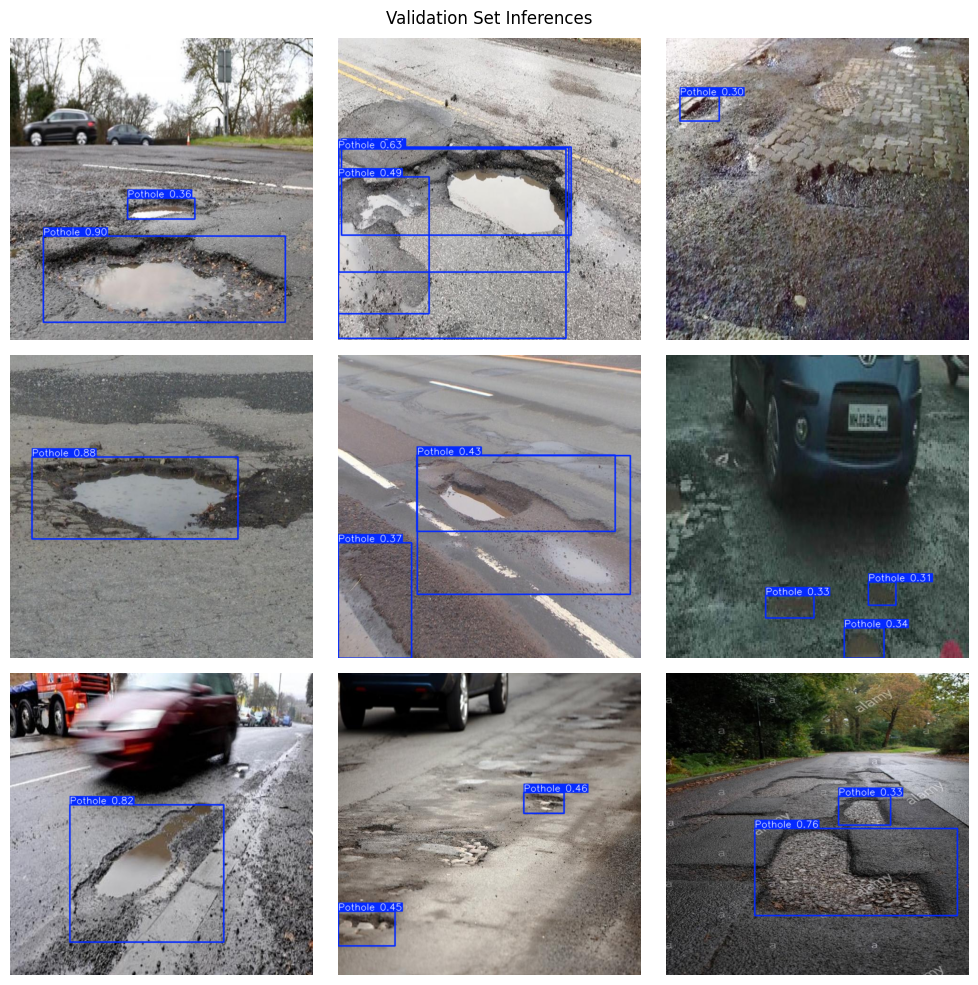

In [8]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

#select Random images
numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set Inferences')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = model.predict(source= imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()

Make the Inference video

In [9]:
# Change the model for the best model and do everything again and compare

bestModelpath = '/content/runs/detect/train/weights/best.pt'
bestModel = YOLO(bestModelpath)

In [12]:
import shutil
videoPath = '/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4'

model.predict(source=videoPath, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/375) /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 5 Potholes, 40.3ms
video 1/1 (frame 2/375) /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 2 Potholes, 7.6ms
video 1/1 (frame 3/375) /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 2 Potholes, 7.0ms
video 1/1 (frame 4/375) /content

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Pothole'}
 obb: None
 orig_img: array([[[146, 137, 129],
         [177, 168, 160],
         [178, 169, 161],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        [[197, 188, 180],
         [206, 197, 189],
         [164, 155, 147],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        [[150, 141, 133],
         [183, 174, 166],
         [188, 179, 171],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        ...,
 
        [[ 80,  92, 102],
         [ 70,  82,  92],
         [ 63,  75,  85],
         ...,
         [ 61,  81, 101],
         [ 62,  82, 102],
         [ 65,  85, 105]],
 
        [[ 70,  82,  92],
         [ 63,  75,  85],
         [ 59,  71,  81],
         ...,
         [ 61,  7

In [13]:
import subprocess

# Convert AVI to MP4 using FFmpeg
subprocess.call(['ffmpeg', '-y', '-loglevel', 'panic', '-i', '/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/output_video.mp4'])

from IPython.display import Video

# Display the converted MP4 video
Video("/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/output_video.mp4", embed=True, width=960)

In [ ]:
import shutil
import subprocess
from IPython.display import Video


# Path to the input video
video_path = '/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4'

# Run the YOLO model on the video and save the output
results = model.predict(source=video_path, save=True, save_txt=False, save_conf=False)

# The default output is saved in the 'runs/detect' folder in a subfolder named after the model
output_dir = '/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/'
output_video_path = f'{output_dir}/output_video.mp4'  # Make sure this is the correct saved output path

# Convert the output video to MP4 using FFmpeg (if necessary)
# This step is often unnecessary since YOLO typically saves output as MP4 by default, but if needed, run FFmpeg:
subprocess.call(['ffmpeg', '-y', '-loglevel', 'panic', '-i', output_video_path, output_video_path])

# Display the converted MP4 video
Video(output_video_path, embed=True, width=960)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/375) /content/drive/My Drive/eafit/detection/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 1 Pothole, 138.0ms
video 1/1 (frame 2/375) /content/drive/My Drive/eafit/detection/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 1 Pothole, 144.7ms
video 1/1 (frame 3/375) /content/drive/My Drive/eafit/detection/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 1 Pothole, 158.0ms
video 1/1 (frame 4/375) /content/drive/My Dri

In [16]:
import shutil
from ultralytics import YOLO
from IPython.display import Video
import os

# Path to the input video
video_path = '/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4'

# Run the YOLO model on the video and specify the save directory in Google Drive
results = model.predict(source=video_path, save=True, save_txt=False, save_conf=False, save_dir='/content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/')

# Output will now be saved directly in your Google Drive folder
print(f"Results saved directly to Google Drive.")


# YOLO typically saves the output in 'runs/detect'
output_video_path = os.path.join(video_path, 'output_video.mp4')  # Check if the video is saved here


# Display the output video using IPython
Video(output_video_path, embed=True, width=960)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/375) /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 5 Potholes, 8.8ms
video 1/1 (frame 2/375) /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 2 Potholes, 17.0ms
video 1/1 (frame 3/375) /content/drive/MyDrive/DeepLearning Datasets/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 2 Potholes, 7.8ms
video 1/1 (frame 4/375) /content

In [ ]:
!ls /content/runs/detect/

predict  train	train2	train3	train4
